In [1]:
from cw.io import read_cw_data
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

# Read and analyse the crowdwater data

In [2]:
cw_data = read_cw_data()
cw_data.WATER_LEVEL.unique()

/home/esowc31/CW4Floods/cw/io.py:45: DtypeWarning: Columns (2,3,7,11,16,28,36,38,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_name)


array([nan, 'minus 1', 'plus 1', 'minus 2', 'plus 2', 'plus 3', 'plus 4',
       'minus 3', 'plus 6', 'plus 5', 'plus 7', 'minus 4', 'minus 5',
       'minus 6', 'false'], dtype=object)

In [3]:
len(cw_data)

34415

In [4]:
cw_data = cw_data[cw_data.WATER_LEVEL.notna()]
len(cw_data)

7321

In [5]:
cw_data = cw_data[cw_data.WATER_LEVEL != "false" ]
len(cw_data)

7320

In [6]:
cw_data.columns

Index(['ID', 'ROOT_ID', 'LATITUDE', 'LONGITUDE', 'CATEGORY', 'IMAGE',
       'FLOW_TYPE', 'SNOW_ICE_PRESENT', 'MOISTURE', 'WATER_LEVEL', 'PP_TYPE',
       'PP_RIVER_STAGNENT', 'PP_STREAM_OBSERVATION_TIME',
       'PP_STREAM_PROPORTIONS', 'PP_SHORE_PLOTSIZE', 'PP_AMOUNT',
       'WL_ADVANCED', 'WL_WIDTH', 'WL_DEPTH', 'STREAMTYPE_TYPE',
       'STREAMTYPE_DRINK_WATER', 'STREAMTYPE_SWIMMING', 'STREAMTYPE_BUILTIN',
       'WL_MATERIAL', 'STREAMTYPE_WATERCOLOR', 'STREAMTYPE_GROUNDVISIBLE',
       'STREAMTYPE_ANIMALS', 'STREAMTYPE_POLLUTION', 'STREAMTYPE_DRIESUP',
       'STREAMTYPE_NAME', 'WL_METHOD', 'WL_FLOW_VELOCITY', 'WL_DISTANCE',
       'WL_TIME_A', 'WL_TIME_B', 'WL_TIME_C', 'WL_DISTANCE_B', 'WL_DISTANCE_C',
       'PP_ADVANCED', 'PP_ADV_PET', 'PP_ADV_POSOFT', 'PP_ADV_POHARD',
       'PP_ADV_PS', 'PP_ADV_PSE', 'PP_ADV_MULTILAYER', 'PP_ADV_OTHER',
       'PP_PLASTIC_REMOVED_CHECK', 'PHYSICAL_SCALE_UNIT',
       'PHYSICAL_SCALE_LEVEL', 'DESCRIPTION', 'SPOTTED_AT'],
      dtype='object')

In [18]:
lat = cw_data.LATITUDE.astype('float64')
lon = cw_data.LONGITUDE.astype('float64')

In [7]:
reading_frequency = np.unique(cw_data.ROOT_ID, return_counts = True)

In [8]:
sorted_freq = sorted(zip(reading_frequency[1], reading_frequency[0]), reverse=True)
tuples = zip(*sorted_freq)
freq, station_id = [ list(tuple) for tuple in tuples]

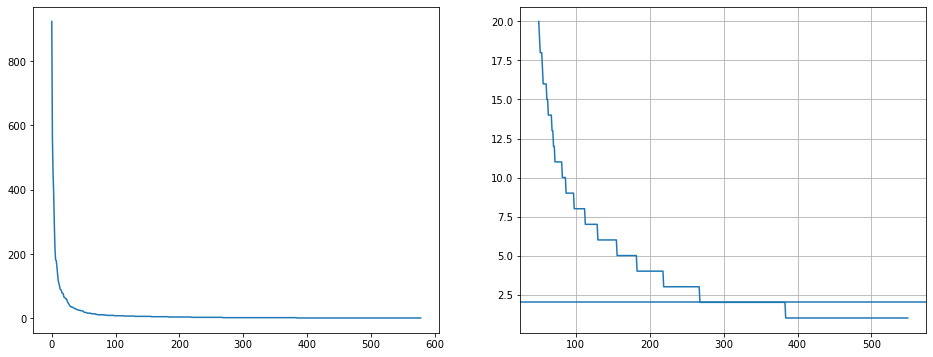

In [58]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 6))
ax1.plot(freq)
ax2.plot(np.arange(50, 550), freq[50:550])
ax2.axhline(2)
plt.grid()
plt.show()

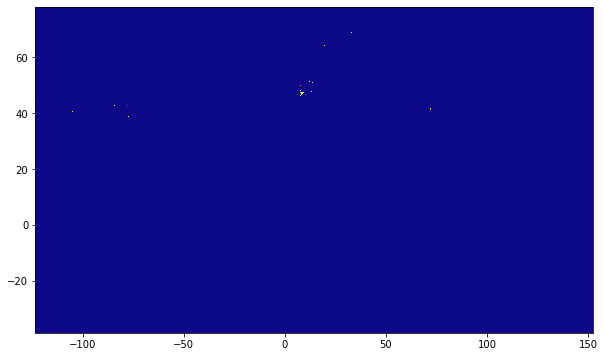

In [53]:
fig, ax = plt.subplots(figsize = (10,6))
ax.hist2d(lon, lat, bins = 1000, vmin=3, vmax=6, cmap='plasma')
plt.show()

(array([1733., 2123.,  799., 1012.,  498.,  251.,  325.,   80.,  161.,
         102.,  137.,   45.,   54.]),
 array([ 0.        ,  0.92307692,  1.84615385,  2.76923077,  3.69230769,
         4.61538462,  5.53846154,  6.46153846,  7.38461538,  8.30769231,
         9.23076923, 10.15384615, 11.07692308, 12.        ]),
 <BarContainer object of 13 artists>)

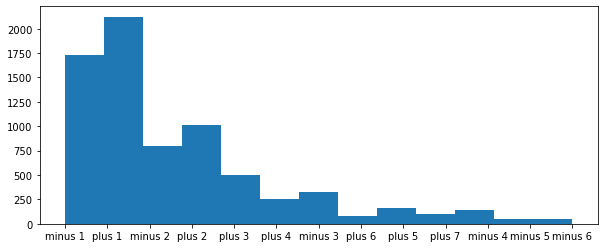

In [41]:
fig, ax = plt.subplots(1,1, figsize = (10, 4))

plt.hist(cw_data.WATER_LEVEL, bins = 13)

In [54]:
cw_data.SPOTTED_AT

27       2017-03-04 17:03
32       2017-03-11 18:17
33       2017-03-12 11:52
71       2017-04-05 18:33
92       2017-04-26 07:56
               ...       
34381    2022-06-03 13:12
34397    2022-06-03 17:52
34402    2022-06-04 09:20
34408    2022-06-04 13:04
34410    2022-06-03 18:04
Name: SPOTTED_AT, Length: 7320, dtype: object